In [9]:
import psycopg2
from sqlalchemy import create_engine
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import time
import random
import plotly.express as px
from datetime import timedelta, datetime, tzinfo, timezone,  time
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [133]:
cbs_path = 'E:paper2_analysis/gis_paper2/buurten_cbs_2022'
household_file = '84799NED_TypedDataSet_13092022_104711'

In [140]:
household_data = pd.read_excel(f'{cbs_path}/{household_file}.xlsx')
buurten_geom = gpd.read_file(f'{cbs_path}/buurten_select.shp')
# buurten_geom_NL = gpd.read_file(f'{cbs_path}/CBS_buurten2021.shp')


In [141]:
household_data.head(3)

,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,...,AfstandTotKinderdagverblijf_108,AfstandTotSchool_109,ScholenBinnen3Km_110,OppervlakteTotaal_111,OppervlakteLand_112,OppervlakteWater_113,MeestVoorkomendePostcode_114,Dekkingspercentage_115,MateVanStedelijkheid_116,Omgevingsadressendichtheid_117
0,2288,GM0373,Bergen (NH.),Gemeente,GM0373,.,29839,14399,15440,3529,...,0.8,0.8,4.1,12023,9896,2127,.,NaN,4,819
1,2289,WK037301,Bergen (NH.),Wijk,WK037301,1,12000,5615,6385,1465,...,0.7,0.7,6.1,476,472,3,.,NaN,3,1136
2,2290,BU03730101,Bergen (NH.),Buurt,BU03730101,1,520,240,280,55,...,0.5,0.5,6.0,14,14,0,1861,1.0,3,1466


In [142]:
for i in household_data.columns:
    print(i)

ID
WijkenEnBuurten
Gemeentenaam_1
SoortRegio_2
Codering_3
IndelingswijzigingWijkenEnBuurten_4
AantalInwoners_5
Mannen_6
Vrouwen_7
k_0Tot15Jaar_8
k_15Tot25Jaar_9
k_25Tot45Jaar_10
k_45Tot65Jaar_11
k_65JaarOfOuder_12
Ongehuwd_13
Gehuwd_14
Gescheiden_15
Verweduwd_16
WestersTotaal_17
NietWestersTotaal_18
Marokko_19
NederlandseAntillenEnAruba_20
Suriname_21
Turkije_22
OverigNietWesters_23
GeboorteTotaal_24
GeboorteRelatief_25
SterfteTotaal_26
SterfteRelatief_27
HuishoudensTotaal_28
Eenpersoonshuishoudens_29
HuishoudensZonderKinderen_30
HuishoudensMetKinderen_31
GemiddeldeHuishoudensgrootte_32
Bevolkingsdichtheid_33
Woningvoorraad_34
GemiddeldeWOZWaardeVanWoningen_35
PercentageEengezinswoning_36
PercentageMeergezinswoning_37
PercentageBewoond_38
PercentageOnbewoond_39
Koopwoningen_40
HuurwoningenTotaal_41
InBezitWoningcorporatie_42
InBezitOverigeVerhuurders_43
EigendomOnbekend_44
BouwjaarVoor2000_45
BouwjaarVanaf2000_46
GemiddeldElektriciteitsverbruikTotaal_47
Appartement_48
Tussenwoning_49
H

In [143]:
relevant_columns = ['ID', 'WijkenEnBuurten','Gemeentenaam_1', 'Codering_3', 
                    'AantalInwoners_5', 'HuishoudensTotaal_28', 'GemiddeldeHuishoudensgrootte_32', 
                   'PersonenautoSTotaal_100', 'PersonenautoSPerHuishouden_103']

In [144]:
household_data_select = household_data[relevant_columns].copy()
household_data_select.head(1)

,ID,WijkenEnBuurten,Gemeentenaam_1,Codering_3,AantalInwoners_5,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,PersonenautoSTotaal_100,PersonenautoSPerHuishouden_103
0,2288,GM0373,Bergen (NH.),GM0373,29839,13836,2.1,16070,1.2


In [145]:
household_data_geom = buurten_geom.merge(household_data_select, left_on='BU_CODE', right_on='Codering_3')

In [147]:
household_data_geom.to_file(f'{cbs_path}/household_data_select.geojson', drive="GeoJSON")


C:\Users\Louise\anaconda3\envs\geo\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [149]:
household_data_geom.columns

Index(['BU_CODE', 'JRSTATCODE', 'BU_NAAM', 'WK_CODE', 'WK_NAAM', 'GM_CODE',
       'GM_NAAM', 'POSTCODE', 'BEV_DICHTH', 'AANT_INW', 'AANTAL_HH',
       'P_EENP_HH', 'P_HH_Z_K', 'P_HH_M_K', 'GEM_HH_GR', 'P_WEST_AL',
       'P_N_W_AL', 'geometry', 'ID', 'WijkenEnBuurten', 'Gemeentenaam_1',
       'Codering_3', 'AantalInwoners_5', 'HuishoudensTotaal_28',
       'GemiddeldeHuishoudensgrootte_32', 'PersonenautoSTotaal_100',
       'PersonenautoSPerHuishouden_103'],
      dtype='object')

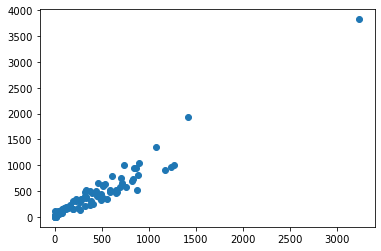

In [151]:
plt.scatter(household_data_geom.HuishoudensTotaal_28, household_data_geom.PersonenautoSTotaal_100)

In [158]:
test = household_data_geom.HuishoudensTotaal_28 / household_data_geom.PersonenautoSTotaal_100
print(household_data_geom.HuishoudensTotaal_28.sum())
print(household_data_geom.PersonenautoSTotaal_100.sum())

36160
37610
